Specific objectives
1. Build the predictive model that can estimate the expected revenue of movie
2. Provide insights
3. Compare linear regression performance with more advanced models

STEP 1
Import the libraries and dataset e.g. pandas, numpy, matplotlib e.t.c

STEP 2 
Preprocessing and modelling
a) train test split
b) LabelEncoder
c) Standardscaler: Scales features for better model performance
d) countVectorizer: converts text data into numeric vectors
e)Metrics: Offers tools for evaluating model accuracy

Advanced modeling
xgboost- A high performance gradient boosting algorithms
utility
warnings.filterwarnings("ignore"): Hides unnecessary warning messages for cleaner output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('boxoffice.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [4]:
data.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170
2693,Interstellar,158336835,77904664,Universal,132903825,3914,93959844,PG-13,Comedy,170


In [ ]:
data.head(200) #first 5 records

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158
...,...,...,...,...,...,...,...,...,...,...
195,Harry Potter,231607679,235981173,Paramount,149699133,2600,87343698,NC-17,Drama,116
196,Toy Story,171369738,433734064,Universal,61747951,2240,132298160,R,Animation,106
197,Finding Nemo,174415878,628783070,Sony,96673981,2575,265231331,PG-13,Thriller,94
198,Black Panther,244121326,383238916,Universal,42559935,1846,173418937,R,Action,105


In [ ]:
#checking dataset size
data.shape # (rows, colums)

(2694, 10)

In [ ]:
data.describe().T


,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget,release_days
count,2.694000e+03,2.694000e+03,2.694000e+03,2694.000000,2.694000e+03,2694.000000
mean,1.508539e+08,7.719177e+08,9.971321e+07,2263.039347,1.537996e+08,90.897550
std,8.579997e+07,4.284414e+08,5.721762e+07,1298.559140,8.557624e+07,50.894041
min,8.277650e+05,3.261301e+06,1.385690e+05,10.000000,5.197977e+06,1.000000
25%,7.673272e+07,3.991135e+08,5.033848e+07,1161.000000,7.861876e+07,47.000000
50%,1.525725e+08,7.665551e+08,9.981418e+07,2271.500000,1.562567e+08,91.000000
75%,2.247314e+08,1.143920e+09,1.489805e+08,3392.250000,2.274832e+08,135.000000
max,2.998107e+08,1.499310e+09,1.999336e+08,4499.000000,2.998597e+08,179.000000


In [12]:
data.drop(columns=['world_revenue', 'opening_revenue'], axis=1, inplace=True)
data.describe()

,domestic_revenue,opening_theaters,budget,release_days
count,2.694000e+03,2694.000000,2.694000e+03,2694.000000
mean,1.508539e+08,2263.039347,1.537996e+08,90.897550
std,8.579997e+07,1298.559140,8.557624e+07,50.894041
min,8.277650e+05,10.000000,5.197977e+06,1.000000
25%,7.673272e+07,1161.000000,7.861876e+07,47.000000
50%,1.525725e+08,2271.500000,1.562567e+08,91.000000
75%,2.247314e+08,3392.250000,2.274832e+08,135.000000
max,2.998107e+08,4499.000000,2.998597e+08,179.000000


In [17]:
#checking missing values in percentage

(data.isnull().mean() / data.shape[0]) * 100


title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [19]:
data.isnull().sum()

title               0
domestic_revenue    0
distributor         0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64

In [20]:
print(data.to_string())

                         title  domestic_revenue   distributor  opening_theaters     budget   MPAA     genres  release_days
0                 The Avengers           6026491  Warner Bros.               253  174687337      R  Animation            16
1                      Titanic         169411543        Disney               122  103948486      G     Action           103
2                Jurassic Park         107836098          Sony              3826  122104991  NC-17     Horror            89
3                       Avatar          51433697        Disney              3868   46431596      G     Horror            85
4                The Lion King         142791649  Warner Bros.              2934  203513696      R     Comedy           158
5                    Star Wars         283757629     Universal              1216   39257068      R     Comedy           154
6                       Frozen          37740374          Sony              4472   81033758  NC-17     Action            47
7       

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   distributor       2694 non-null   object
 3   opening_theaters  2694 non-null   int64 
 4   budget            2694 non-null   int64 
 5   MPAA              2694 non-null   object
 6   genres            2694 non-null   object
 7   release_days      2694 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 168.5+ KB


In [27]:
data['domestic_revenue'] = data['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [28]:
data.head(100)

,title,domestic_revenue,distributor,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6491,Warner Bros.,253,174687337,R,Animation,16
1,Titanic,411543,Disney,122,103948486,G,Action,103
2,Jurassic Park,836098,Sony,3826,122104991,NC-17,Horror,89
3,Avatar,33697,Disney,3868,46431596,G,Horror,85
4,The Lion King,791649,Warner Bros.,2934,203513696,R,Comedy,158
...,...,...,...,...,...,...,...,...
95,Jurassic Park,538541,Warner Bros.,2774,53683854,R,Drama,100
96,Avatar,828477,Sony,4166,294056742,NC-17,Horror,48
97,The Lion King,776212,Paramount,2212,134219315,R,Thriller,88
98,Star Wars,275123,Disney,3531,205898288,PG-13,Comedy,138


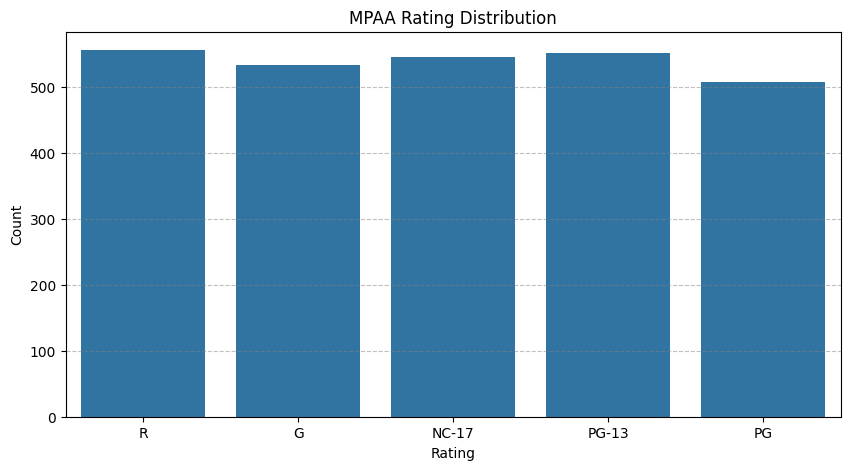

In [ ]:
plt.figure(figsize=(10, 5))
sb.countplot(x=data['MPAA'])
plt.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
plt.title('MPAA Rating Distribution')
plt.xlabel('MPAA')
plt.ylabel('Count')
plt.show()


In [40]:
#Encode categorial columns into numbers

for col in ['distributor', 'MPAA']:
    lu = LabelEncoder()
    data[col] = lu.fit_transform(data[col])

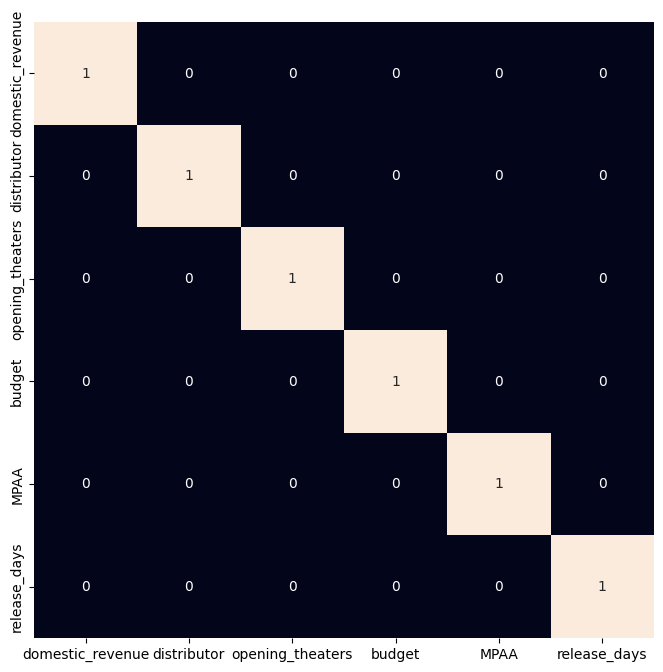

In [46]:
# Generate a heatmap showing strong correlations (r > 0.8) among numeric features.
# 'annot=True' displays True/False values in each cell, and 'cbar=True' adds a color bar to show the scale.

plt.figure(figsize= (8,8))
sb.heatmap(data.select_dtypes(include=np.number).corr()>0.8,annot=True,
           cbar=False)
plt.show()

In [49]:
#Preparing data for model training and validation
#We will remove the title and target colum(Domestic revenue)
# We shall split the data 90% training and 10% validation to ensure better model performance

features = data.drop(['title', 'domestic_revenue'], axis=1)
target = data['domestic_revenue'].values

X_train, X_val, Y_train, Y_val=train_test_split(features,target, test_size=0.1,random_state=22)

X_train.shape, X_val.shape


((2424, 6), (270, 6))

In [ ]:
#normalising the features for better model training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val